In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import random
import os
import numpy as np


def seed_everything(seed=777):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything()

In [3]:
res = []
for file_path in glob.glob('../data/*.csv'):
    res.append(pd.read_csv(file_path))
df = pd.concat(res).sort_values('datetime').reset_index(drop=True)

In [4]:
df.head(3)

,wrestler,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,final_opponent,datetime
0,蒼樹山,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,200001
1,金開山,1,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,和歌乃山,200001
2,魁皇,0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,武双山,200001


In [5]:
df = df.dropna().reset_index(drop=True)

In [6]:
len(df)

4340

In [7]:
df.rename(columns={'day_15': 'final_day'}, inplace=True)
df['wins_at_day_14'] = df.iloc[:, df.columns.str.startswith('day_')].sum(axis=1)
# df.rename(columns={'final_day': 'day_15'}, inplace=True)

# features

In [8]:
df.head(2)

,wrestler,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,final_day,final_opponent,datetime,wins_at_day_14
0,金開山,1,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,和歌乃山,200001,6.0
1,魁皇,0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,武双山,200001,7.0


## final_opponent_wins_at_day_14

In [9]:
_tmp = df[['wrestler', 'datetime', 'wins_at_day_14']].rename(columns={'wrestler': 'final_opponent', 'wins_at_day_14': 'final_opponent_wins_at_day_14'})
df = pd.merge(df, _tmp, on=['final_opponent', 'datetime'], how='left')

## wins_till_final_day

In [10]:
def calc_wins_till_final_day(row):
    cnt = 0
    for i in range(14):
        if row.iloc[14 - i] == 1:
            cnt += 1
        else:
            return cnt
    return cnt


def calc_loses_till_final_day(row):
    cnt = 0
    for i in range(14):
        if row.iloc[14 - i] == 0:
            cnt += 1
        else:
            return cnt
    return cnt


df['wins_till_final_day'] = df.apply(calc_wins_till_final_day, axis=1)
df['loses_till_final_day'] = df.apply(calc_loses_till_final_day, axis=1)

In [11]:
df_list = []
for index, row in df.iterrows():
    _df = pd.DataFrame(row.iloc[1:15].T)
    _df.columns = ['results']
    _df['id'] = index
    df_list.append(_df)

df_tsf = pd.concat(df_list).reset_index(drop=True)
df_tsf['results'] = df_tsf['results'].astype(float)
df_tsf.head()

,results,id
0,1.0,0
1,0.0,0
2,0.0,0
3,1.0,0
4,1.0,0


In [12]:
from tsfresh import extract_features
extracted_features = extract_features(df_tsf, column_id='id')

Feature Extraction: 100%|██████████| 10/10 [02:16<00:00, 11.62s/it]


In [13]:
extracted_features.head()

variable,results__abs_energy,results__absolute_sum_of_changes,"results__agg_autocorrelation__f_agg_""mean""__maxlag_40","results__agg_autocorrelation__f_agg_""median""__maxlag_40","results__agg_autocorrelation__f_agg_""var""__maxlag_40","results__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","results__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","results__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","results__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","results__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,results__symmetry_looking__r_0.9,results__symmetry_looking__r_0.9500000000000001,results__time_reversal_asymmetry_statistic__lag_1,results__time_reversal_asymmetry_statistic__lag_2,results__time_reversal_asymmetry_statistic__lag_3,results__value_count__value_-1,results__value_count__value_0,results__value_count__value_1,results__variance,results__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
0,6.0,7.0,-0.128179,-0.102564,0.240665,1.0,0.0,0.0,0.0,NaN,...,1.0,1.0,0.000000,0.0,-0.125,0.0,8.0,6.0,0.244898,0.0
1,7.0,8.0,-0.030600,0.000000,0.282874,1.0,0.0,0.0,0.0,NaN,...,1.0,1.0,0.000000,-0.1,0.000,0.0,7.0,7.0,0.250000,0.0
2,11.0,5.0,-0.221478,-0.236364,0.129146,1.0,0.0,0.0,0.0,NaN,...,1.0,1.0,-0.083333,-0.1,-0.250,0.0,3.0,11.0,0.168367,0.0
3,7.0,8.0,-0.040174,0.000000,0.229328,1.0,0.0,0.0,0.0,NaN,...,1.0,1.0,0.000000,0.1,0.250,0.0,7.0,7.0,0.250000,0.0
4,9.0,6.0,-0.061907,0.029060,0.191730,1.0,0.0,0.0,0.0,NaN,...,1.0,1.0,0.000000,0.1,0.250,0.0,5.0,9.0,0.229592,0.0


In [14]:
df = pd.concat([df, extracted_features.reset_index(drop=True)], axis=1)

In [15]:
split_datetime = 201501
train = df[df['datetime']<split_datetime]
test = df[~(df['datetime']<split_datetime)]

In [16]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features.iloc[train.index])
features_filtered = select_features(extracted_features.iloc[train.index].dropna(axis=1), train['final_day'])

 'results__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'results__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"'
 'results__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"stderr"'
 'results__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"intercept"'
 'results__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"rvalue"'
 'results__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"slope"'
 'results__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"stderr"'
 'results__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"intercept"'
 'results__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"rvalue"'
 'results__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"slope"'
 'results__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"stderr"'
 'results__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"intercept"'
 'results__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"rvalue"'
 'results__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"slope

/Users/shotaroishihara/project/sumo-predictor/env/lib/python3.6/site-packages/pandas/core/generic.py:7772: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors, try_cast=try_cast)


In [17]:
features_filtered.columns, len(features_filtered.columns)

(Index(['results__change_quantiles__f_agg_"var"__isabs_False__qh_0.6__ql_0.4',
        'results__change_quantiles__f_agg_"mean"__isabs_True__qh_0.6__ql_0.4',
        'results__symmetry_looking__r_0.1',
        'results__change_quantiles__f_agg_"var"__isabs_True__qh_0.6__ql_0.4',
        'results__symmetry_looking__r_0.05', 'results__symmetry_looking__r_0.2',
        'results__symmetry_looking__r_0.15000000000000002',
        'results__ratio_beyond_r_sigma__r_1',
        'results__symmetry_looking__r_0.25'],
       dtype='object', name='variable'), 9)

# benchmark

In [18]:
TRAIN_COL = list(df.iloc[:, df.columns.str.startswith('day_')].columns) + list(features_filtered.columns) + [
    'wins_at_day_14',
    'final_opponent_wins_at_day_14',
    'wins_till_final_day',
    'loses_till_final_day'
]
# TRAIN_COL = list(set(train.columns) - set(['wrestler', 'final_day', 'final_opponent', 'datetime']))
TARGET = 'final_day'

X_train = train[TRAIN_COL]
X_test = test[TRAIN_COL]

y_train = train[TARGET]
y_test = test[TARGET]

In [19]:
import pandas as pd
import lightgbm as lgb


def lgbm(X_tr, X_val, y_tr, y_val, X_test, params, categorical_features):

    lgb_train = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_features)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train, categorical_feature=categorical_features)

    model = lgb.train(
        params, lgb_train,
        valid_sets=[lgb_train, lgb_eval],
        num_boost_round=10000,
        early_stopping_rounds=30,
        verbose_eval=10
    )

    y_valid = model.predict(X_val)
    y_pred = model.predict(X_test, num_iteration=model.best_iteration)

    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = X_tr.columns.values
    fold_importance_df["importance"] = model.feature_importance(importance_type='gain')

    return y_pred, y_valid, model, fold_importance_df


/Users/shotaroishihara/project/sumo-predictor/env/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [20]:
from sklearn.model_selection import KFold, TimeSeriesSplit
import seaborn as sns


lgbm_params = {
    'max_depth': 16,
    'num_leaves': 4,
    'min_data_in_leaf': 10,
    'objective': 'binary',
    'learning_rate': 0.1,
    "boosting": "gbdt",
    "feature_fraction": 0.7,
    "bagging_freq": 1,
    "bagging_fraction": 0.7,
    "metric": 'auc',
    "lambda_l1": 0.3,
    "verbosity": -1,
    "random_state": 42,
  }

categorical_features = list(df.iloc[:, df.columns.str.startswith('day_')].columns)

METRIC = 'auc'

In [21]:
train_basho, valid_basho = np.split(train['datetime'].unique(), [59])
len(valid_basho)

28

In [22]:
y_preds = []
models = []
feature_importances = pd.DataFrame()
# oof_train = np.zeros((len(X_train),))

for split_index in range(30, 60):

    train_basho, valid_basho = np.split(train['datetime'].unique(), [split_index])
    valid_basho = valid_basho[0:28]

    X_tr = X_train[train['datetime'].isin(train_basho)]
    X_val = X_train[train['datetime'].isin(valid_basho)]

    y_tr = y_train[train['datetime'].isin(train_basho)]
    y_val = y_train[train['datetime'].isin(valid_basho)]

    y_pred, y_val, model, fold_importance_df = lgbm(
        X_tr, X_val, y_tr, y_val, X_test, lgbm_params, categorical_features
    )

#     oof_train[valid_index] = y_val
    y_preds.append(y_pred)
    models.append(model)
    feature_importances = pd.concat([feature_importances, fold_importance_df], axis=0)


/Users/shotaroishihara/project/sumo-predictor/env/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/shotaroishihara/project/sumo-predictor/env/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 30 rounds.
[10]	training's auc: 0.633448	valid_1's auc: 0.553031
[20]	training's auc: 0.663191	valid_1's auc: 0.554794
[30]	training's auc: 0.680221	valid_1's auc: 0.573172
[40]	training's auc: 0.689484	valid_1's auc: 0.575523
[50]	training's auc: 0.694333	valid_1's auc: 0.574539
[60]	training's auc: 0.704756	valid_1's auc: 0.57316
Early stopping, best iteration is:
[34]	training's auc: 0.684183	valid_1's auc: 0.577867
Training until validation scores don't improve for 30 rounds.
[10]	training's auc: 0.639002	valid_1's auc: 0.575373
[20]	training's auc: 0.671337	valid_1's auc: 0.560895
[30]	training's auc: 0.689534	valid_1's auc: 0.570195
[40]	training's auc: 0.690095	valid_1's auc: 0.575437
[50]	training's auc: 0.694899	valid_1's auc: 0.577738
[60]	training's auc: 0.707405	valid_1's auc: 0.576363
[70]	training's auc: 0.712021	valid_1's auc: 0.578431
[80]	training's auc: 0.717993	valid_1's auc: 0.579839
[90]	training's auc: 0.722277	va

Training until validation scores don't improve for 30 rounds.
[10]	training's auc: 0.625752	valid_1's auc: 0.552032
[20]	training's auc: 0.632608	valid_1's auc: 0.555697
[30]	training's auc: 0.640903	valid_1's auc: 0.571624
[40]	training's auc: 0.649641	valid_1's auc: 0.567181
[50]	training's auc: 0.658314	valid_1's auc: 0.565201
[60]	training's auc: 0.670868	valid_1's auc: 0.559484
Early stopping, best iteration is:
[30]	training's auc: 0.640903	valid_1's auc: 0.571624
Training until validation scores don't improve for 30 rounds.
[10]	training's auc: 0.619111	valid_1's auc: 0.563145
[20]	training's auc: 0.629439	valid_1's auc: 0.563975
[30]	training's auc: 0.637463	valid_1's auc: 0.571714
[40]	training's auc: 0.645753	valid_1's auc: 0.569299
[50]	training's auc: 0.656289	valid_1's auc: 0.566838
[60]	training's auc: 0.664232	valid_1's auc: 0.565666
Early stopping, best iteration is:
[30]	training's auc: 0.637463	valid_1's auc: 0.571714
Training until validation scores don't improve for

In [23]:
scores = [
    m.best_score['valid_1'][METRIC] for m in models
]
score = sum(scores) / len(scores)
print('===CV scores===')
print(score)
print(scores)

===CV scores===
0.5699616171902685
[0.5778669199471883, 0.5806079339155318, 0.5853260578826298, 0.574366097720217, 0.5763820170629296, 0.5766616616616617, 0.5693254656637844, 0.5766153743671729, 0.5798008926890914, 0.5716245791245791, 0.5647158480944713, 0.5576587011640162, 0.5556359252561784, 0.5557507273066966, 0.5674605949800019, 0.5577731092436975, 0.5679383892546188, 0.5716237509224724, 0.5717138995985532, 0.568817526013098, 0.5744535246163683, 0.5652792458600081, 0.5786222158813791, 0.5803946053946054, 0.5718401773277617, 0.5698555604844672, 0.5603408296591031, 0.5566019279936858, 0.5609031864199834, 0.5728917702021057]


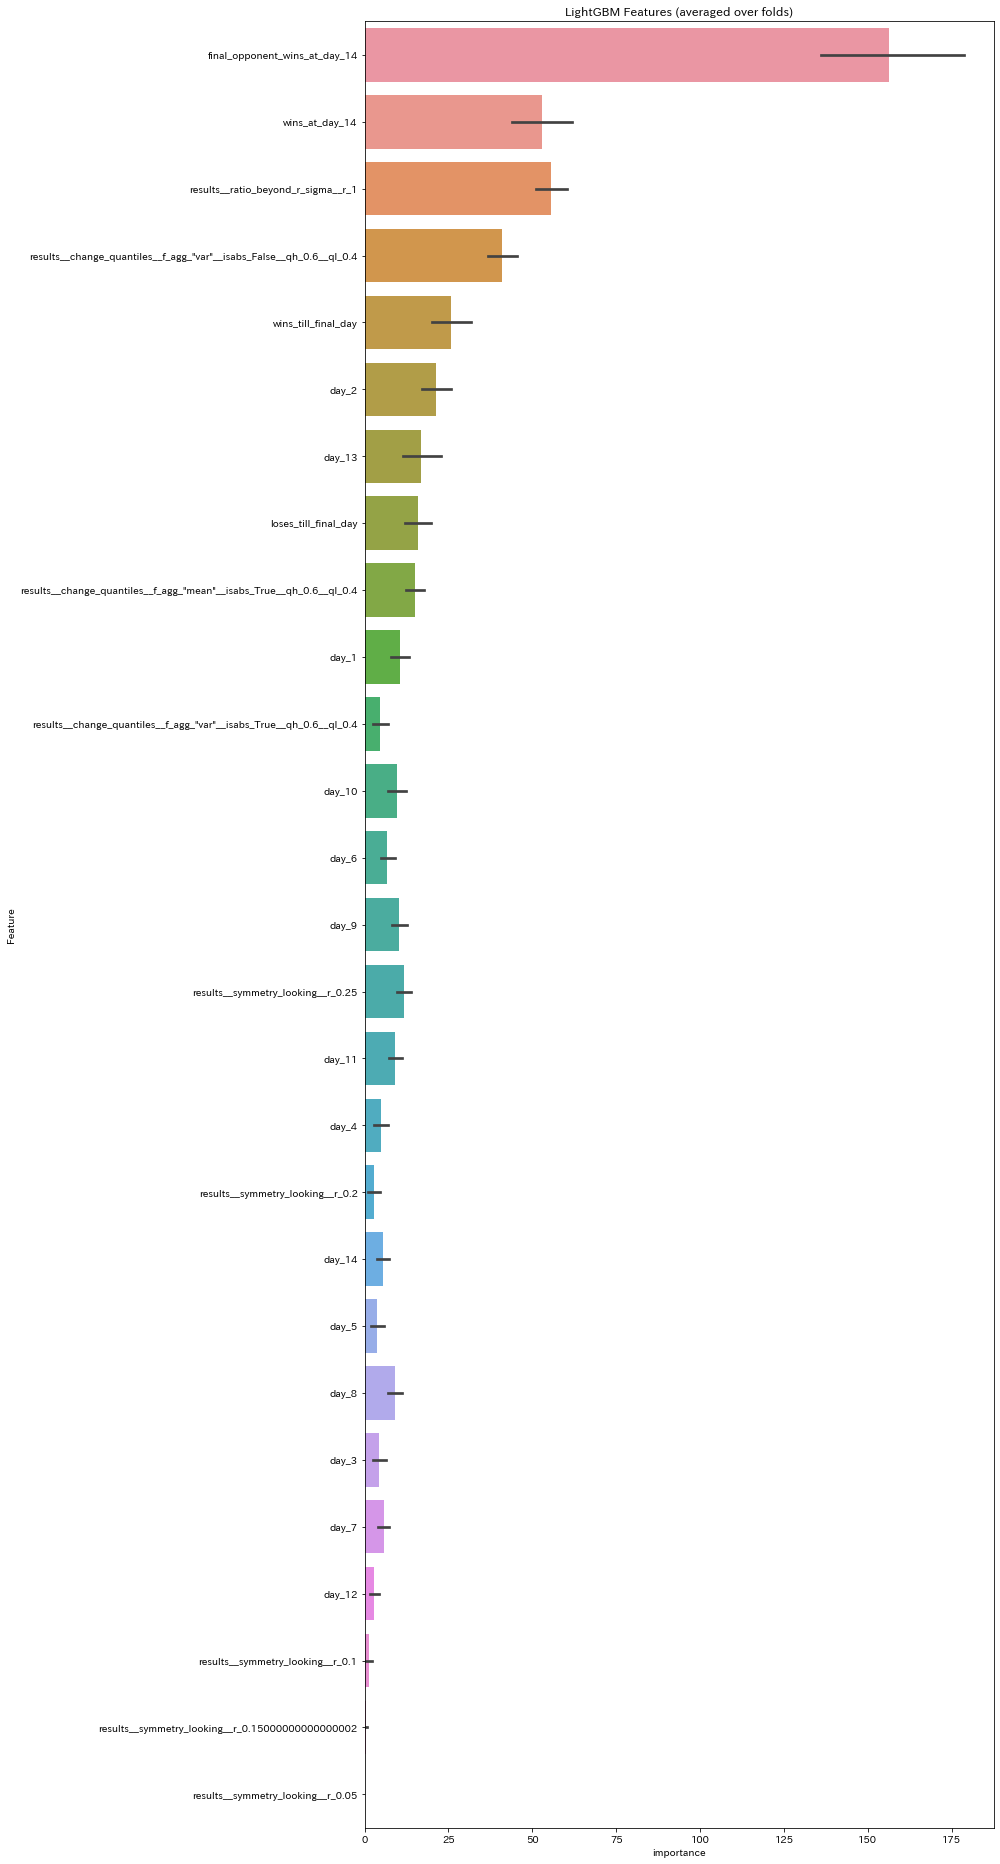

In [24]:
cols = feature_importances.groupby('Feature').mean().sort_values(by="importance", ascending=False)[:200].index

best_features = feature_importances.loc[feature_importances.Feature.isin(cols)]
plt.figure(figsize=(14, 26))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('LightGBM Features (averaged over folds)')
plt.tight_layout()

In [25]:
y_sub = sum(y_preds) / len(y_preds)
y_sub[:10]

array([0.47654292, 0.44777403, 0.45705976, 0.40731619, 0.47224618,
       0.39579595, 0.56672376, 0.49937299, 0.64493938, 0.47057149])

(array([ 15.,  91., 205., 337., 220., 102.,  25.,  30.,  17.,   8.]),
 array([0.33664286, 0.37889456, 0.42114625, 0.46339795, 0.50564965,
        0.54790134, 0.59015304, 0.63240474, 0.67465643, 0.71690813,
        0.75915983]),
 <a list of 10 Patch objects>)

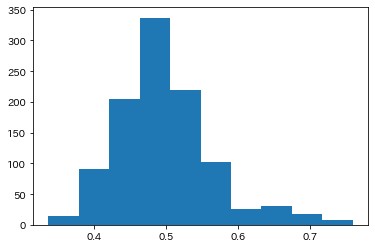

In [26]:
plt.hist(y_sub)

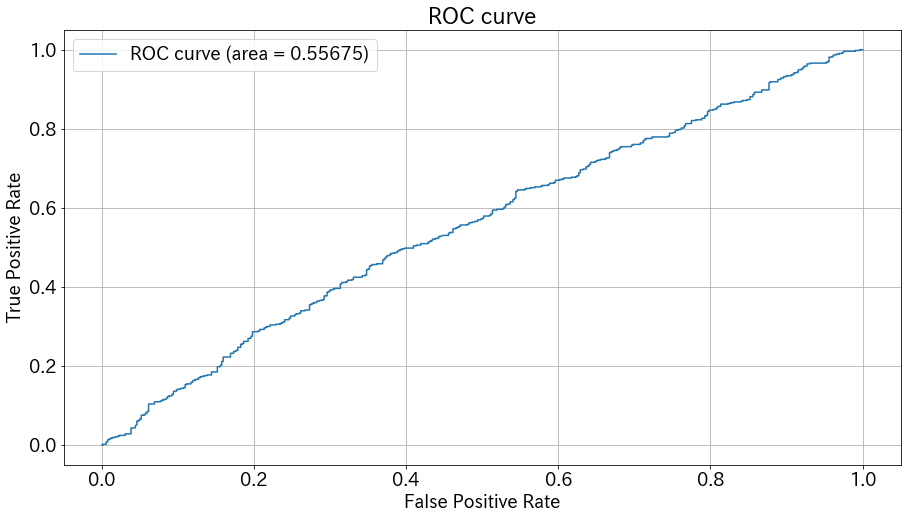

In [27]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_sub)
auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(15, 8))
plt.rcParams["font.size"] = 18
plt.plot(fpr, tpr, label='ROC curve (area = %.5f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [28]:
y_sub = np.where(y_sub > 0.5, 1, 0)
y_sub[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_sub)

array([[327, 193],
       [282, 248]])

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_sub)

0.5476190476190477